In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid")
# plt.rc("figure", autolayout=True, figsize=(10, 5))
# plt.rc(
#     "axes",
#     labelweight="bold",
#     labelsize="large",
#     titleweight="bold",
#     titlesize=14,
#     titlepad=10,
# )
# plot_params = dict(
#     color="0.75",
#     style=".-",
#     markeredgecolor="0.25",
#     markerfacecolor="0.25",
#     legend=False,
# )
# %config InlineBackend.figure_format = 'retina'

In [ ]:
# sns.color_palette("tab10")
# sns.set_palette("muted")

In [ ]:
PATH_SALES_FILE ="/content/drive/MyDrive/TheMasterData/project-day/data/supermarket_sales.csv"
PATH_HOLIDAYS_FILE ="/content/drive/MyDrive/TheMasterData/project-day/data/holiday2019.csv"

In [ ]:
df_raw_data = pd.read_csv(PATH_SALES_FILE)
# df_raw_data = pd.read_csv(PATH_SALES_FILE, parse_dates=['Date'])
# df_raw_data = df_raw_data.set_index('Date')
# df_raw_data = df_raw_data.to_period('D')

df_raw_data.info()
df_holiday = pd.read_csv(PATH_HOLIDAYS_FILE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Holiday Dated   7 non-null      object
 1   Public holiday  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<Axes: >

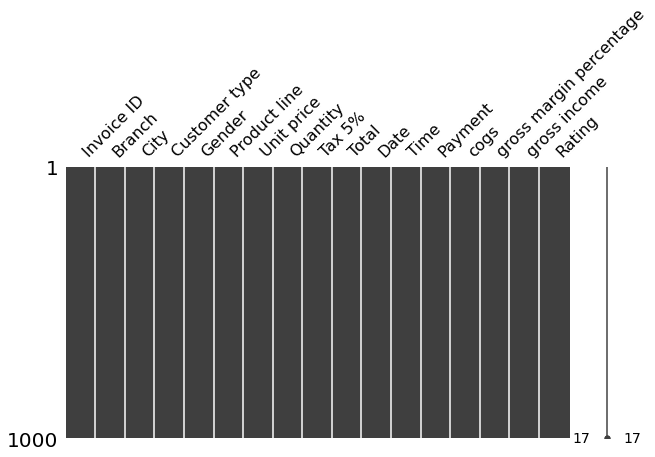

In [ ]:
#check missing value
msno.matrix(df_raw_data,figsize=(10, 5))

In [ ]:
df_raw_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df_raw_data.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df_raw_data.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df_raw_data.Rating.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [ ]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df_holiday

,Holiday Dated,Public holiday
0,2019-01-01,International New Year’s Day
1,2019-01-04,Independence Day
2,2019-01-06,Kayin New Year Day
3,2019-02-12,Union Day
4,2019-03-02,Peasants Day
5,2019-03-20,Full Moon Day Of tabaung
6,2019-03-27,Armed Forces Day


In [ ]:
df = df_raw_data.copy()

In [ ]:
def date_parts(data, date_colname='Date',time_column='Time'):
    '''create year, month, day, dayname columns'''
    data['year']=data[date_colname].dt.year
    data['week'] = data[date_colname].dt.week
    data['month']=data[date_colname].dt.month
    data['day']=data[date_colname].dt.day
    data['day_of_week']=data[date_colname].dt.day_of_week
    data['day_name']=data[date_colname].dt.day_name().astype('category')
    data['month_name'] = data[date_colname].dt.strftime('%B').astype('category')
    data['hour'] = data[time_column].dt.hour
    generate_time_of_day(data,time_column)

def generate_time_of_day(data,time_column='Time'):
  data['time_of_day'] = pd.cut(pd.to_datetime(data[time_column]).dt.hour,
       bins=[10, 14, 18, 22],
       labels=['10 AM-14 PM', '14 PM-18 PM', '18 PM -22 PM'],
       right=False,
       include_lowest=True)


In [ ]:
df["Date"] =  pd.to_datetime(df["Date"], format="%m/%d/%Y")
df_holiday['Holiday Dated'] = pd.to_datetime(df_holiday["Holiday Dated"], format="%m/%d/%Y")
df['Time'] = pd.to_datetime(df["Time"], infer_datetime_format=True)

In [ ]:
date_parts(df)

<ipython-input-17-fae405077836>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data[date_colname].dt.week


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,year,week,month,day,day_of_week,day_name,month_name,hour,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,9.1,2019,1,1,5,5,Saturday,January,13,10 AM-14 PM
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,9.6,2019,10,3,8,4,Friday,March,10,10 AM-14 PM
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,7.4,2019,9,3,3,6,Sunday,March,13,10 AM-14 PM
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,8.4,2019,4,1,27,6,Sunday,January,20,18 PM -22 PM
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,5.3,2019,6,2,8,4,Friday,February,10,10 AM-14 PM


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'year', 'week', 'month', 'day', 'day_of_week', 'day_name',
       'month_name', 'hour', 'time_of_day', 'is_holidays'],
      dtype='object')

In [ ]:
df['is_holidays'] = 'N'

In [ ]:
df.loc[df['day_name'] == 'Sunday', 'is_holidays'] = 'Y'
df.loc[df['day_name'] == 'Saturday', 'is_holidays'] = 'Y'

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,year,week,month,day,day_of_week,day_name,month_name,hour,time_of_day,is_holidays
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2019,1,1,5,5,Saturday,January,13,10 AM-14 PM,Y
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2019,10,3,8,4,Friday,March,10,10 AM-14 PM,N
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2019,9,3,3,6,Sunday,March,13,10 AM-14 PM,Y
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2019,4,1,27,6,Sunday,January,20,18 PM -22 PM,Y
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2019,6,2,8,4,Friday,February,10,10 AM-14 PM,N


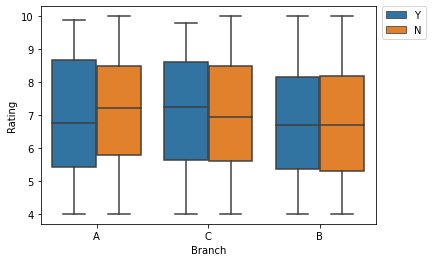

In [ ]:
sns.boxplot(data=df , x="Branch" , y= 'Rating' , hue='is_holidays')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
def plot_heatmap(data,title="Heatmap"):
  plt.figure(figsize=(10, 5))
  #sns.set_palette("colorblind")

  x_axis_labels = ['Mon','Tue','Wed','Thru','Fri','Sat','Sun']

  ax = sns.heatmap(
      data,
      annot=True,
      #annot_kws={'color':'black'},
      #vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True,
      xticklabels=x_axis_labels
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      #rotation=45
      #horizontalalignment='right'
  );

  plt.title(title)

def plot_bar_by_day_name(data,x,y,asc=False,title="Bar"):
  plt.figure(figsize=(10, 5))
  ax = sns.barplot(
      data=data,
      x=data[x],
      y=data[y],
      #order=data.sort_values(y,ascending=asc)[x],
      order=days,
      color='steelblue'
  )
  # ax.set_xticklabels(
  #     ax.get_xticklabels(),
  #     rotation=45,
  #     horizontalalignment='right'
  # );

  for container in ax.containers:
    #print("incontatiner")
    ax.bar_label(container, fmt='%.1f%%', size = 12)
    #ax.bar_label(container, fmt='%.1f%%', size = 14)

  plt.title(title)

def plot_bar_by_time_of_day(data,x,y,asc=False,title="Bar"):
  plt.figure(figsize=(5, 6))
  ax = sns.barplot(
      data=data,
      x=data[x],
      y=data[y],
      #order=data.sort_values(y,ascending=asc)[x],
      color='steelblue'
  )
  # ax.set_xticklabels(
  #     ax.get_xticklabels(),
  #     rotation=45,
  #     horizontalalignment='right'
  # );

  for container in ax.containers:
    #print("incontatiner")
    ax.bar_label(container, fmt='%.1f%%', size = 12)
    #ax.bar_label(container, fmt='%.1f%%', size = 14)

  plt.title(title)




In [ ]:
#use for heatmap order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday' ]

In [ ]:
out = df.groupby(['day_name', 'hour'])['Rating'].mean().unstack()
out = out.reindex(days)
out.info()
#plot_heatmap(out,"Heatmap Rating weekday and hour")

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Monday to Sunday
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   10      7 non-null      float64
 1   11      7 non-null      float64
 2   12      7 non-null      float64
 3   13      7 non-null      float64
 4   14      7 non-null      float64
 5   15      7 non-null      float64
 6   16      7 non-null      float64
 7   17      7 non-null      float64
 8   18      7 non-null      float64
 9   19      7 non-null      float64
 10  20      7 non-null      float64
dtypes: float64(11)
memory usage: 672.0+ bytes


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,year,week,month,day,day_of_week,day_name,month_name,hour,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,9.1,2019,1,1,5,5,Saturday,January,13,10 AM-14 PM
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,9.6,2019,10,3,8,4,Friday,March,10,10 AM-14 PM
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,7.4,2019,9,3,3,6,Sunday,March,13,10 AM-14 PM
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,8.4,2019,4,1,27,6,Sunday,January,20,18 PM -22 PM
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,5.3,2019,6,2,8,4,Friday,February,10,10 AM-14 PM


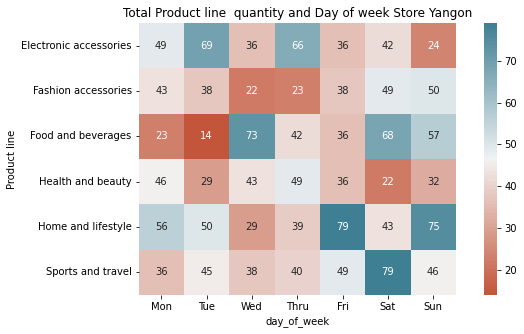

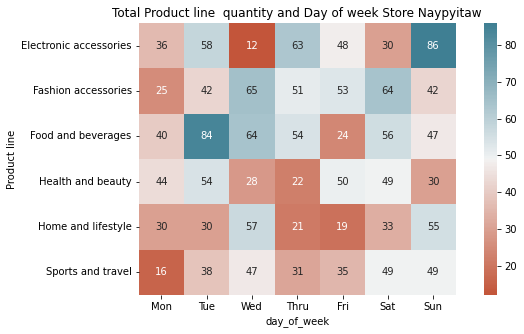

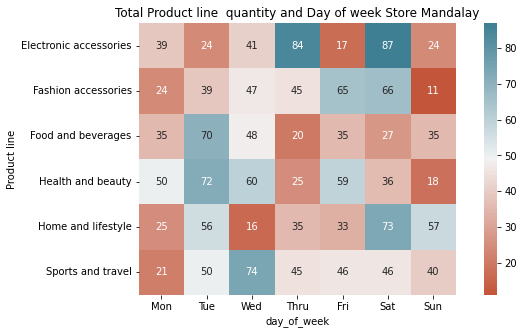

In [ ]:
store_list =  df.City.unique()
#print(store_list)

for store in store_list:
  df_store = df[df['City']== store].copy()
  #print(df_store.City.unique)
  data_heatmap = df_store.groupby(['Product line', 'day_of_week'])['Quantity'].sum().unstack()
  #data_heatmap= data_heatmap.reindex(days)
  plot_heatmap(data_heatmap,"Total Product line  quantity and Day of week Store {}".format(store))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

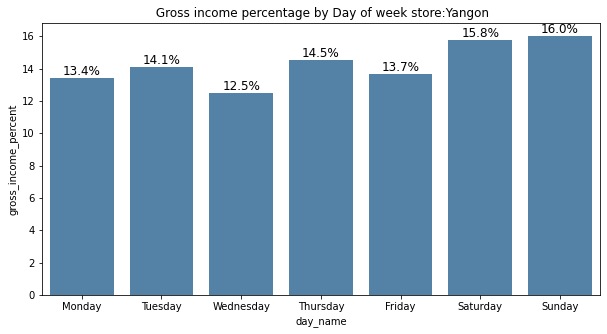

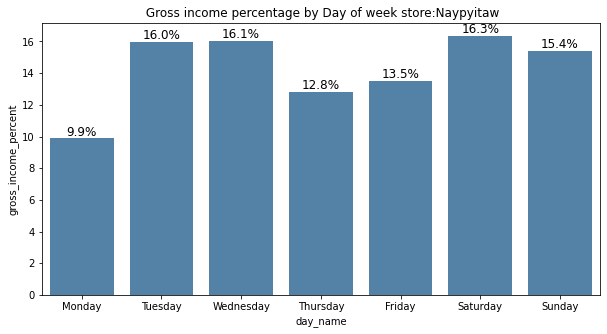

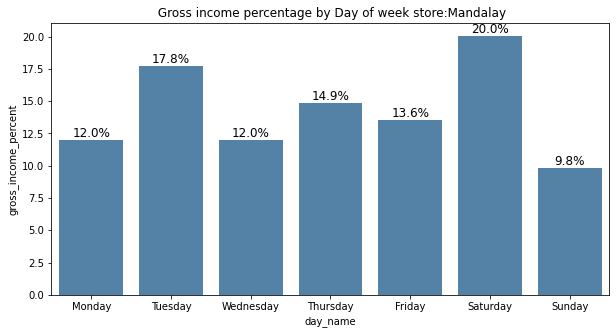

In [ ]:

for store in store_list:
  df_store = df[df['City']== store].copy()
  data_bar  = df_store.groupby(['City','day_name'])['gross income'].sum().reset_index(name="Count")
  data_bar['gross_income_percent'] = data_bar['Count'].transform(lambda x: x / x.sum()*100)
  # print(data_bar.head(100))
  # print(data_bar.Count.sum())
  # print(data_bar.Count_percent.sum())
  plot_bar_by_day_name(data_bar,"day_name","gross_income_percent",True," Gross income percentage by Day of week store:{}".format(store))
  #plot_bar(data_bar,"Count_percent","day_name",False,"Title")

In [ ]:
df.hour.unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

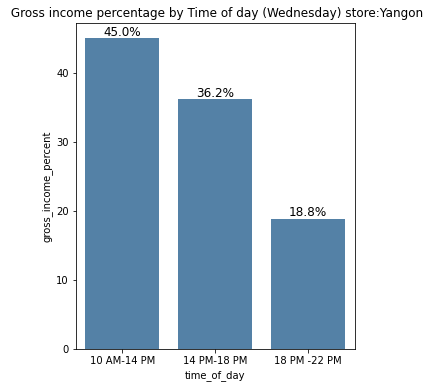

In [ ]:
city = 'Yangon'
promotion_day = 'Wednesday'

df_promotion = df.query('City == @city and day_name==@promotion_day')
df_plot = df_promotion.groupby(['time_of_day'])['gross income'].sum().reset_index(name="Count")
df_plot['gross_income_percent'] = df_plot['Count'].transform(lambda x: x / x.sum()*100)
plot_bar_by_time_of_day(df_plot,"time_of_day","gross_income_percent",True," Gross income percentage by Time of day ({}) store:{}".format(promotion_day,city))


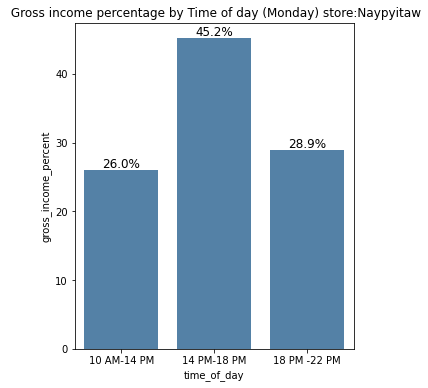

In [ ]:
city = 'Naypyitaw'
promotion_day = 'Monday'

df_promotion = df.query('City == @city and day_name==@promotion_day')
df_plot = df_promotion.groupby(['time_of_day'])['gross income'].sum().reset_index(name="Count")
df_plot['gross_income_percent'] = df_plot['Count'].transform(lambda x: x / x.sum()*100)
plot_bar_by_time_of_day(df_plot,"time_of_day","gross_income_percent",True," Gross income percentage by Time of day ({}) store:{}".format(promotion_day,city))

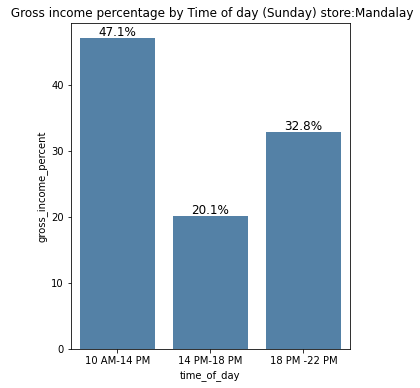

In [ ]:
city = 'Mandalay'
promotion_day = 'Sunday'

df_promotion = df.query('City == @city and day_name==@promotion_day')
df_plot = df_promotion.groupby(['time_of_day'])['gross income'].sum().reset_index(name="Count")
df_plot['gross_income_percent'] = df_plot['Count'].transform(lambda x: x / x.sum()*100)
plot_bar_by_time_of_day(df_plot,"time_of_day","gross_income_percent",True," Gross income percentage by Time of day ({}) store:{}".format(promotion_day,city))

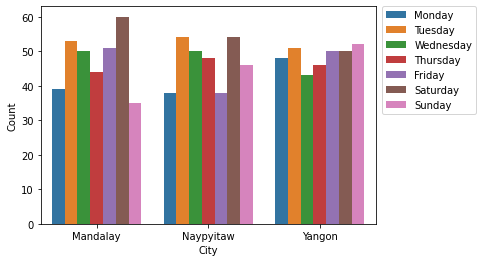

In [ ]:
df_day_count = df.groupby(['City','day_name'])['day_name'].count().reset_index(name="Count")


df_day_count.day_name.unique()

sns.barplot(data=df_day_count,x='City' , y = 'Count' , hue='day_name', hue_order=days )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
df_day_count.head(100)

,City,day_name,Count
0,Mandalay,Friday,51
1,Mandalay,Monday,39
2,Mandalay,Saturday,60
3,Mandalay,Sunday,35
4,Mandalay,Thursday,44
5,Mandalay,Tuesday,53
6,Mandalay,Wednesday,50
7,Naypyitaw,Friday,38
8,Naypyitaw,Monday,38
9,Naypyitaw,Saturday,54


In [ ]:
df_day_count.head()

,City,day_name,Count
0,Mandalay,Friday,51
1,Mandalay,Monday,39
2,Mandalay,Saturday,60
3,Mandalay,Sunday,35
4,Mandalay,Thursday,44


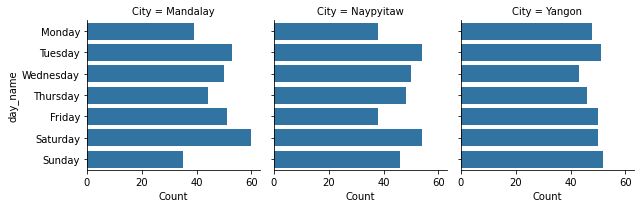

In [ ]:
df_day_count.sort_values('day_name')


graph = sns.FacetGrid(df_day_count,col="City" )
graph.map(sns.barplot,"Count","day_name",order=days)


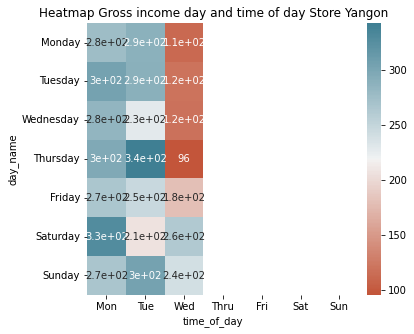

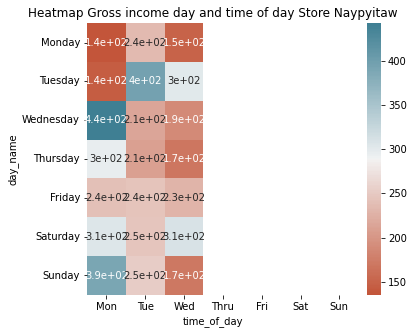

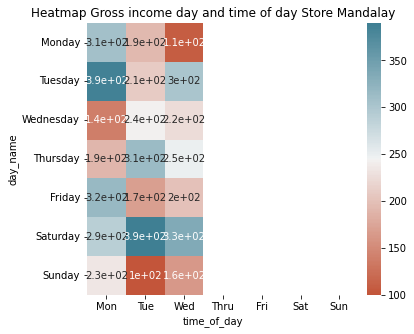

In [ ]:
for store in store_list:
  df_store = df[df['City']== store].copy()
  #print(df_store.City.unique)
  data_heatmap = df_store.groupby(['day_name', 'time_of_day'])['gross income'].sum().unstack()
  data_heatmap= data_heatmap.reindex(days)
  plot_heatmap(data_heatmap,"Heatmap Gross income day and time of day Store {}".format(store))

In [ ]:
city = 'Mandalay'
day_name = 'Sunday'
df_mandalay = df.query( 'City == @city and day_name == @day_name and hour==10' )

df_mandalay.Payment


909    Credit card
Name: Payment, dtype: object

In [ ]:
def plot_line(data,title="Line plot"):
  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x="hour", y="Rating",
             hue="day_name",
             data=data)


  plt.title(title)

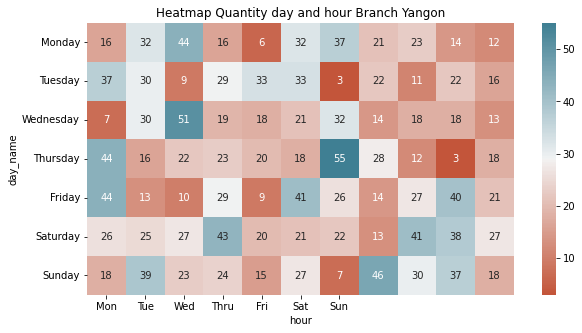

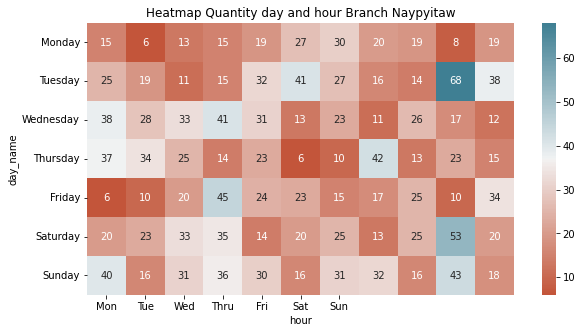

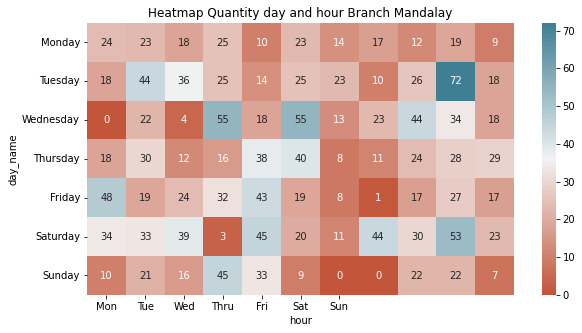

In [ ]:
for store in store_list:
  df_store = df[df['City']== store].copy()
  #print(df_store.City.unique)
  data_heatmap = df_store.groupby(['day_name', 'hour'])['Quantity'].sum().unstack()
  data_heatmap= data_heatmap.reindex(days)
  plot_heatmap(data_heatmap,"Heatmap Quantity day and hour Branch {}".format(store))

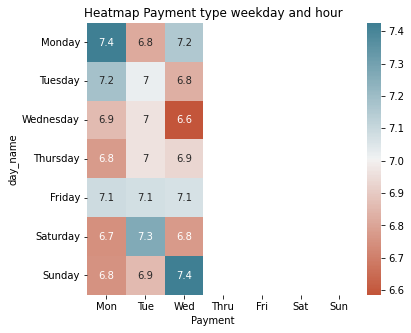

In [ ]:
out = df.groupby(['day_name', 'Payment'])['Rating'].mean().unstack()
out = out.reindex(days)
plot_heatmap(out,"Heatmap Payment type weekday and hour")

<Figure size 1440x360 with 0 Axes>

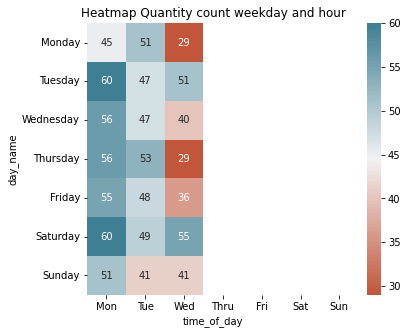

In [ ]:
out = df.groupby(['day_name', 'time_of_day'])['Quantity'].count().unstack()
out = out.reindex(days)

# out.head(7)
plt.figure(figsize=(20, 5))
plot_heatmap(out,"Heatmap Quantity count weekday and hour")

Text(0.5, 1.0, 'Heatmap Invoice count weekday and hour')

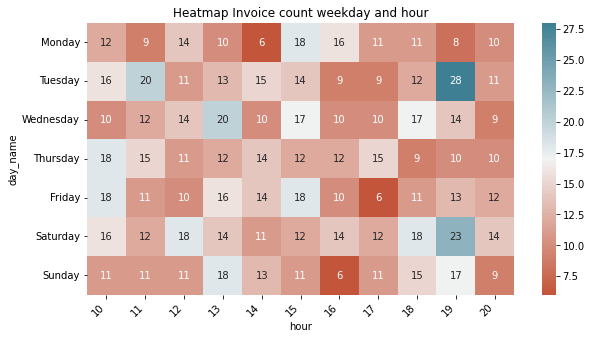

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
out = df.groupby(['day_name', 'hour'])['Invoice ID'].count().unstack()

out = out.reindex(days)

plt.figure(figsize=(10, 5))
ax = sns.heatmap(
    out,
    annot=True,
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Heatmap Invoice count weekday and hour")

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
out = df.groupby(['day_name','City','time_of_day'])['gross income'].mean().unstack()

# out = out[out['City']=='Yangon']

# out = out.reindex(days)

# plt.figure(figsize=(10, 5))
# ax = sns.heatmap(
#     out,
#     #vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

out.head()

time_of_day         10 AM-14 PM  14 PM-18 PM  18 PM -22 PM
day_name City                                             
Friday   Mandalay     13.767609    10.562594     16.741958
         Naypyitaw    18.495538    16.232467     22.867650
         Yangon       14.048842    14.526147     12.763750
Monday   Mandalay     20.477667    13.668286     10.789350
         Naypyitaw    12.281000    13.056139     16.683500

In [ ]:
#payment type and rating

Text(0.5, 1.0, 'Product Sales per Hour')

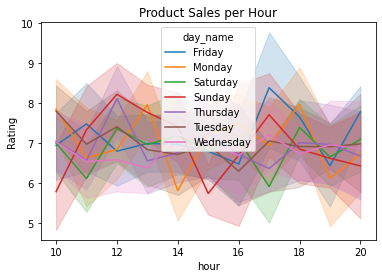

In [ ]:
sns.lineplot(x="hour",  y = 'Rating', hue = 'day_name' ,data =df).set_title("Product Sales per Hour")

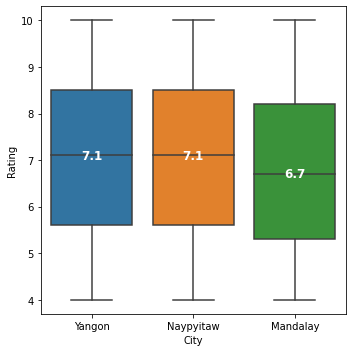

In [ ]:
plt.figure(figsize=(5, 5))



boxplot  = sns.boxplot(data=df,x='City',y='Rating')
ax = boxplot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='bold',
        size=12,
        color='white'
        #bbox=dict(facecolor='#445A64')
        )

boxplot.figure.tight_layout()

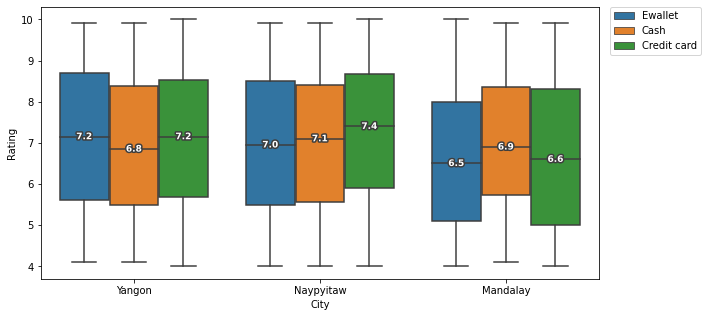

In [ ]:
import matplotlib.patheffects as path_effects
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(
                          x,
                          y,
                          f'{value:{fmt}}',
                          ha='center',
                          va='center',
                          size = 9,
                          fontweight='bold',
                          color='white'
                      )
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])



plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df, x='City', y='Rating', hue="Payment")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
add_median_labels(ax)
plt.show()

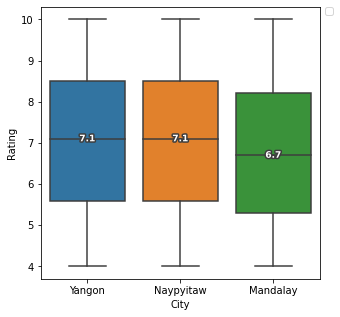

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=df, x='City', y='Rating')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
add_median_labels(ax)
plt.show()

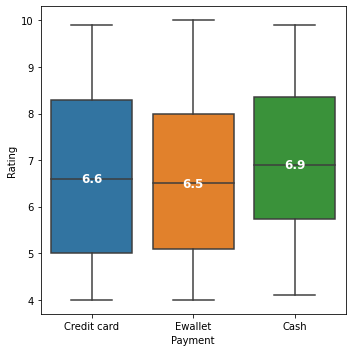

In [ ]:
plt.figure(figsize=(5, 5))

city = 'Mandalay'

df_city = df.query('City==@city')

boxplot  = sns.boxplot(data=df_city,x='Payment',y='Rating')
ax = boxplot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='bold',
        size=12,
        color='white'
        #bbox=dict(facecolor='#445A64')
        )

boxplot.figure.tight_layout()




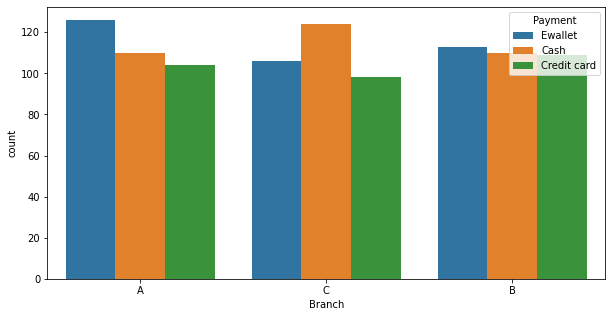

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='Branch',hue='Payment')
plt.show()

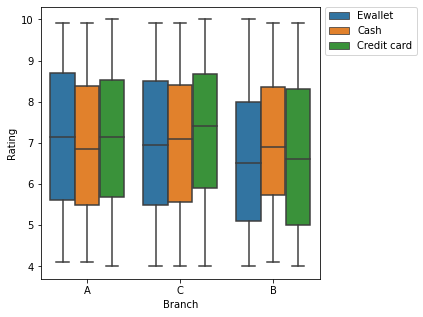

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Branch',y='Rating',hue='Payment')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

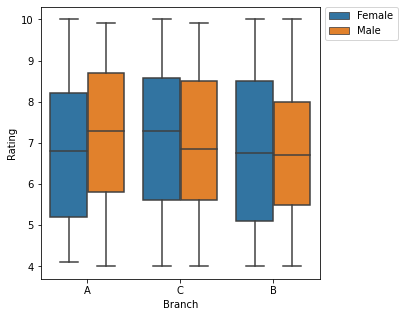

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Branch',y='Rating',hue='Gender')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
df_gender_payment = df.groupby(['Gender','Payment','Branch'])['Invoice ID'].count().reset_index()
df_gender_payment

,Gender,Payment,Branch,Invoice ID
0,Female,Cash,A,59
1,Female,Cash,B,53
2,Female,Cash,C,66
3,Female,Credit card,A,47
4,Female,Credit card,B,59
5,Female,Credit card,C,57
6,Female,Ewallet,A,55
7,Female,Ewallet,B,50
8,Female,Ewallet,C,55
9,Male,Cash,A,51


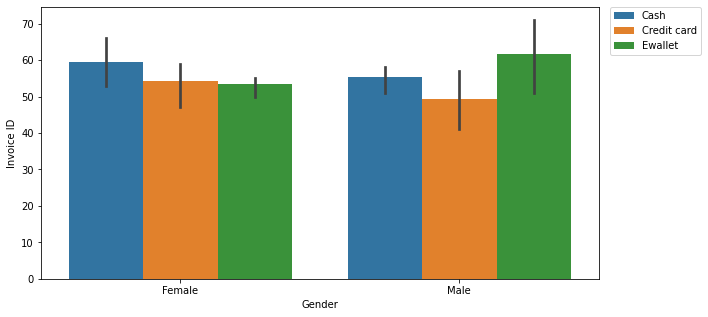

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_gender_payment,x='Gender',y='Invoice ID',hue='Payment')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
df_le_5 = df.query('Rating < 5')

df_le_5.groupby('Branch')['Invoice ID'].count().reset_index()


,Branch,Invoice ID
0,A,52
1,B,59
2,C,42


In [ ]:
df_le_5 = df.query('Rating > 5')

df_le_5.groupby('Branch')['Invoice ID'].count().reset_index()

,Branch,Invoice ID
0,A,280
1,B,266
2,C,280


In [ ]:
df_le_5 = df.query('Rating < 5')

df_le_5.groupby('Branch')['Invoice ID'].count().reset_index()

,Branch,Invoice ID
0,A,52
1,B,59
2,C,42


In [ ]:
groupedDF = df.groupby('Invoice ID',sort=True)['Invoice ID'].count()
groupedDF[groupedDF>0]

Invoice ID
101-17-6199    1
101-81-4070    1
102-06-2002    1
102-77-2261    1
105-10-6182    1
              ..
894-41-5205    1
895-03-6665    1
895-66-0685    1
896-34-0956    1
898-04-2717    1
Name: Invoice ID, Length: 1000, dtype: int64

In [ ]:
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

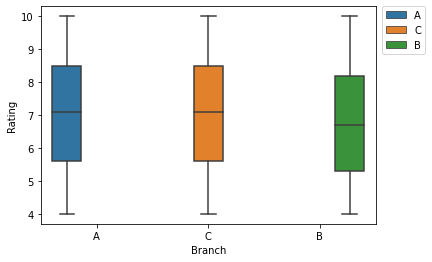

In [ ]:
#plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Branch',y='Rating', hue='Branch')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
df.groupby('Product line')['Total'].sum()

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [ ]:
df_product_line = df.groupby(['Product line','Branch'])['Total'].sum().reset_index()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

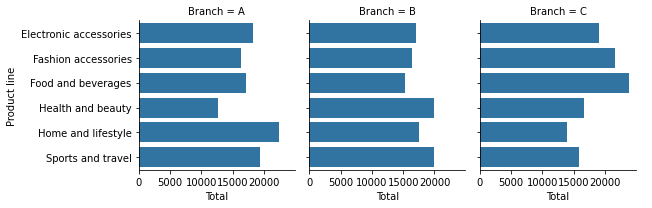

In [ ]:
plt.figure(figsize=(10,10))

graph = sns.FacetGrid(df_product_line, col ='Branch')
graph.map(sns.barplot, 'Total','Product line').add_legend()

plt.show()

In [ ]:
df_product_line

,Product line,Branch,Total
0,Electronic accessories,A,18317.1135
1,Electronic accessories,B,17051.4435
2,Electronic accessories,C,18968.9745
3,Fashion accessories,A,16332.5085
4,Fashion accessories,B,16413.3165
5,Fashion accessories,C,21560.0700
6,Food and beverages,A,17163.1005
7,Food and beverages,B,15214.8885
8,Food and beverages,C,23766.8550
9,Health and beauty,A,12597.7530


In [ ]:
#df["Time"] =  pd.to_datetime(df["Time"], format='%H:%M')

# df['Time'] = pd.to_datetime(df["Time"], infer_datetime_format=True)

In [ ]:
# df['Holiday'] = df['Date'].isin(df_holiday['Holiday Dated'])

In [ ]:
# df[df['Holiday']==True]

In [ ]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(data=df,x='Date' , y = 'Total' , hue = 'Holiday')
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.show()

In [ ]:
# plt.figure(figsize=(8,8))
# sns.boxplot(data=df,x='Branch',y='Rating',hue='Holiday')
# plt.legend(bbox_to_anchor=(1.02, 1), title='Holiday' , loc='upper left', borderaxespad=1)

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
       _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
         "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
          )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [ ]:
df_chk = df[['month','month_name']]
df_chk

,month,month_name
0,1,January
1,3,March
2,3,March
3,1,January
4,2,February
...,...,...
995,1,January
996,3,March
997,2,February
998,2,February


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
len(df.Date.unique())

89

In [ ]:
df.sort_values('Date')
df_time_month = df.groupby(['month'])['Total'].sum().reset_index()


In [ ]:
df_time_month.head()

,month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


<Axes: xlabel='month', ylabel='Total'>

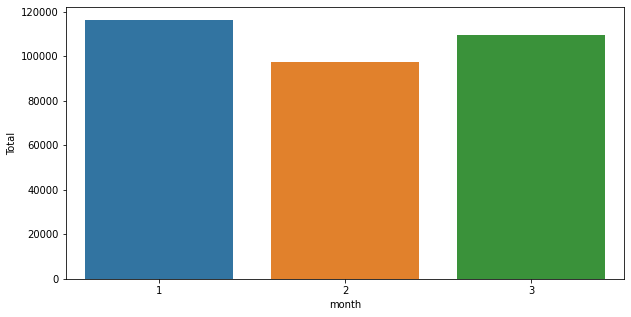

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_time_month,x='month',y='Total')

In [ ]:
#df_time = df.groupby(['Date','Branch'])['Total'].sum().reset_index()

df_time = df.groupby(['Date'])['Total'].sum().reset_index()

In [ ]:
df_time.sort_values('Date')

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835
...,...,...
84,2019-03-26,1962.5130
85,2019-03-27,2902.8195
86,2019-03-28,2229.4020
87,2019-03-29,4023.2430


<Axes: xlabel='Date', ylabel='Total'>

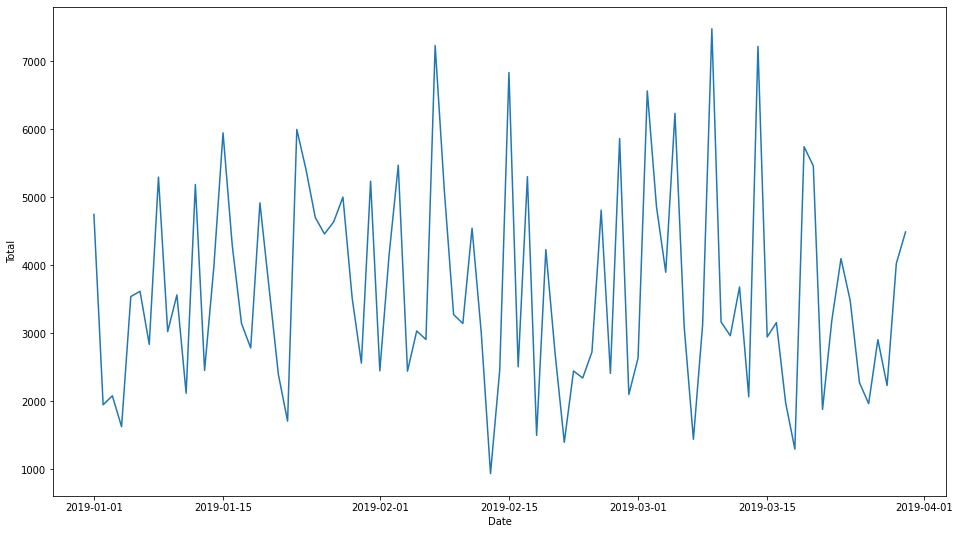

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=df_time,x='Date',y='Total')

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
       _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
         "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
          )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<ipython-input-81-7defb9ee56c5>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(df_time['Total'])


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

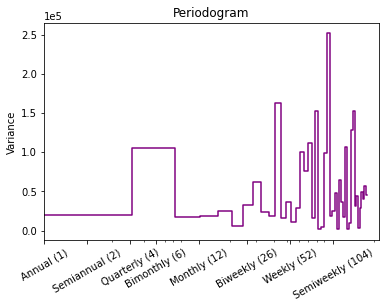

In [ ]:
plot_periodogram(df_time['Total'])

In [ ]:
df_time.head()

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835


In [ ]:
df.shape

(1000, 26)

In [ ]:
def plot_gross_income(data):
  fig, ax = plt.subplots()
  ax.plot(data['Date'], data['gross income'])
  ax.set_xlabel('Date')
  ax.set_ylabel('Gross income (USD)')
  fig.autofmt_xdate()
  plt.tight_layout()


def plot_stl(data,period,title):
  advanced_decomposition = STL(data["gross income"], period=period).fit()
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)



  ax1.title.set_text(title)
  ax1.plot(advanced_decomposition.observed)
  ax1.set_ylabel('Observed')

  ax2.plot(advanced_decomposition.trend)
  ax2.set_ylabel('Trend')

  ax3.plot(advanced_decomposition.seasonal)
  ax3.set_ylabel('Seasonal')

  ax4.plot(advanced_decomposition.resid)
  ax4.set_ylabel('Residuals')

  plt.tight_layout()





In [ ]:
df_gross_income_day  =  df.groupby(['Date','City'])['gross income'].sum().reset_index()
df_gross_income_day = df_gross_income_day.sort_values("Date")

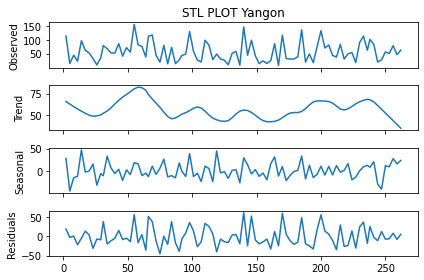

In [ ]:
city  = "Yangon"
df_city  = df_gross_income_day[df_gross_income_day['City']==city]
df_city.sort_values("Date")
#print(len(df_city))
plot_stl(df_city,7,"STL PLOT {}".format(city))

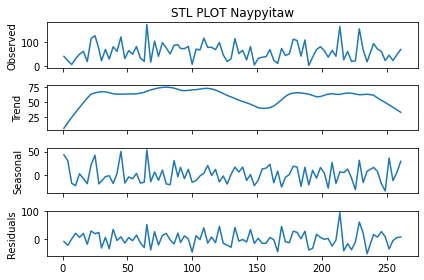

In [ ]:
city  = "Naypyitaw"
df_city  = df_gross_income_day[df_gross_income_day['City']==city]
df_city.sort_values("Date")
#print(len(df_city))
plot_stl(df_city,7,"STL PLOT {}".format(city))

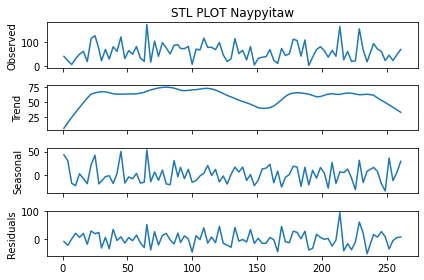

In [ ]:
city  = "Naypyitaw"
df_city  = df_gross_income_day[df_gross_income_day['City']==city]
df_city.sort_values("Date")
#print(len(df_city))
plot_stl(df_city,7,"STL PLOT {}".format(city))

In [ ]:
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import pymannkendall as mk

def cal_mape(actual,prediction):
  mape = mean_absolute_percentage_error(actual, prediction)
  return mape

def split_data(data,day):
  train = data[:day]
  test = data[day:]
  return train , test


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def test_trend(data):
  # perform Mann-Kendall Trend Test
  result = mk.original_test(data)
  print(result)
  print("Trend=",result.trend)
  print("P-value=",result.p)

def test_seasonal(data,period):
  result = mk.seasonal_test(data,period=period)
  print(result)
  print("Trend=",result.trend)
  print("P-value=",result.p)




In [ ]:
df_gross_income_day.head()

,Date,City,gross income
0,2019-01-01,Mandalay,73.1760
1,2019-01-01,Naypyitaw,39.8650
2,2019-01-01,Yangon,112.9200
3,2019-01-02,Mandalay,55.3715
4,2019-01-02,Naypyitaw,22.6500


In [ ]:
df_gross_income_day  =  df.groupby(['Date','City'])['gross income'].sum().reset_index()
df_gross_income_day = df_gross_income_day.sort_values("Date")

In [ ]:
df_gross_income_day.City.unique()

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [ ]:

city = "Naypyitaw"
df_city  = df_gross_income_day[df_gross_income_day['City']==city]
df_city.sort_values("Date")
df_city = df_city.set_index('Date')
df_city = df_city.to_period('D')
#df_city.info()


In [ ]:
df_city.head()

,City,gross income
Date,,
2019-01-01,Naypyitaw,39.8650
2019-01-02,Naypyitaw,22.6500
2019-01-03,Naypyitaw,5.9060
2019-01-04,Naypyitaw,29.9925
2019-01-05,Naypyitaw,48.8295


In [ ]:
test_trend(df_city["gross income"])

Mann_Kendall_Test(trend='no trend', h=False, p=0.6316936518645107, z=-0.47934438417425373, Tau=-0.03500522466039707, s=-134.0, var_s=76985.33333333333, slope=-0.06815568693693713, intercept=63.750272381756766)
Trend= no trend
P-value= 0.6316936518645107


In [ ]:
test_seasonal(df_city["gross income"],7)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=0.8278394571031922, z=0.21747337121053545, Tau=0.0196078431372549, s=10.0, var_s=1712.666666666667, slope=0.13800000000000168, intercept=59.92792857142856)
Trend= no trend
P-value= 0.8278394571031922


In [ ]:
train , test = split_data(df_city,-14)

In [ ]:
train = train.drop('City',axis=1)
test = test.drop('City',axis=1)

In [ ]:

from sklearn import metrics
def mean_absolute_percentage_error_func(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation

    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats

    Returns:
        Mean absolute percentage error
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²

    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats

    Returns:
        MSE, MAE, RMSE, MAPE and R²
    '''
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error_func(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 74 entries, 2019-01-01 to 2019-03-15
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gross income  74 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [ ]:
train.index

PeriodIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
             '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
             '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
             '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
             '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
             '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
             '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
             '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
             '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
             '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
             '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
             '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
             '2019-02-26', '2019-0

In [ ]:
test.index

PeriodIndex(['2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
             '2019-03-20', '2019-03-21', '2019-03-23', '2019-03-24',
             '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
             '2019-03-29', '2019-03-30'],
            dtype='period[D]', name='Date')

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
import pandas as pd


for i in [0.0001,0.1,0.2 ,0.3,0.4,0.5,0.7,1,0.8,0.9]:
  # Create SES model with alpha=0.5
  model = SimpleExpSmoothing(train).fit(smoothing_level=i)
  # Make predictions for next 10 time periods
  forecast = model.forecast(15)

  if(city=='Naypyitaw'):
    forecast = forecast.drop('2019-03-22')
  mape = mean_absolute_percentage_error_func(test['gross income'],forecast)

  print("Alpha={} MAPE={}".format(i,mape))

# model = SimpleExpSmoothing(train).fit(optimized= True, use_brute = True)
# # Make predictions for next 10 time periods
# forecast = model.forecast(14)
# mape = mean_absolute_percentage_error_func(test['gross income'],forecast)

print(mape)



Alpha=0.0001 MAPE=85.09116213631252
Alpha=0.1 MAPE=88.96538884909525
Alpha=0.2 MAPE=95.9976553663859
Alpha=0.3 MAPE=99.40095491911697
Alpha=0.4 MAPE=99.36024575542059
Alpha=0.5 MAPE=95.70957945420187
Alpha=0.7 MAPE=79.67701951128048
Alpha=1 MAPE=48.869718729114176
Alpha=0.8 MAPE=68.5180630839477
Alpha=0.9 MAPE=58.666171717085014
58.666171717085014


In [ ]:
forecast.head(14)

2019-03-16    38.702431
2019-03-17    38.702431
2019-03-18    38.702431
2019-03-19    38.702431
2019-03-20    38.702431
2019-03-21    38.702431
2019-03-23    38.702431
2019-03-24    38.702431
2019-03-25    38.702431
2019-03-26    38.702431
2019-03-27    38.702431
2019-03-28    38.702431
2019-03-29    38.702431
2019-03-30    38.702431
Freq: D, dtype: float64

In [ ]:
model = SimpleExpSmoothing(train).fit(smoothing_level=1)
forecast = model.forecast(15)

if(city=='Naypyitaw'):
    forecast = forecast.drop('2019-03-22')

mape = mean_absolute_percentage_error_func(test['gross income'],forecast)
print(mape)

48.869718729114176


In [ ]:
test.head(14)

,gross income
Date,
2019-03-16,60.4990
2019-03-17,18.7260
2019-03-18,21.4375
2019-03-19,154.6980
2019-03-20,66.7585
2019-03-21,17.1870
2019-03-23,93.4380
2019-03-24,70.8600
2019-03-25,60.8455


In [ ]:
train.tail()

,gross income
Date,
2019-03-11,36.5115
2019-03-12,64.8430
2019-03-13,40.5530
2019-03-14,164.2395
2019-03-15,26.1040


In [ ]:
forecast.head(14)

2019-03-16    26.104
2019-03-17    26.104
2019-03-18    26.104
2019-03-19    26.104
2019-03-20    26.104
2019-03-21    26.104
2019-03-23    26.104
2019-03-24    26.104
2019-03-25    26.104
2019-03-26    26.104
2019-03-27    26.104
2019-03-28    26.104
2019-03-29    26.104
2019-03-30    26.104
Freq: D, dtype: float64

In [ ]:
test.shape

(14, 1)

In [ ]:
test['predict_gross_income'] = forecast

test.head(14)

,gross income,predict_gross_income
Date,,
2019-03-16,60.4990,26.104
2019-03-17,18.7260,26.104
2019-03-18,21.4375,26.104
2019-03-19,154.6980,26.104
2019-03-20,66.7585,26.104
2019-03-21,17.1870,26.104
2019-03-23,93.4380,26.104
2019-03-24,70.8600,26.104
2019-03-25,60.8455,26.104


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 14 entries, 2019-03-16 to 2019-03-30
Freq: D
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gross income          14 non-null     float64
 1   predict_gross_income  14 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


Text(0.5, 1.0, 'Actual and prediced Store Naypyitaw')

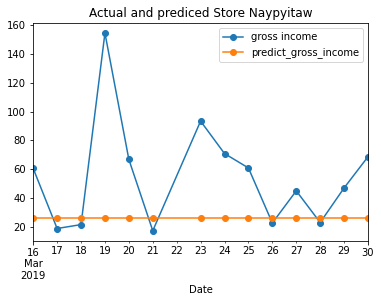

In [ ]:
test.plot(marker='o').set_title("Actual and prediced Store {}".format(city))

<ipython-input-114-db958c5060ff>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['City'], dtype='object')
  moving_mean = df_city.rolling(window=90, center=True, min_periods=7).mean()


<Axes: xlabel='Date'>

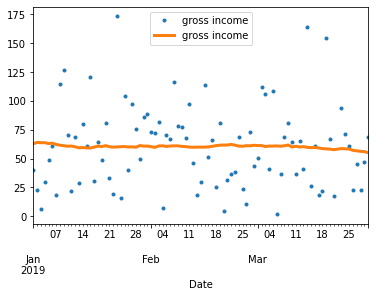

In [ ]:
moving_mean = df_city.rolling(window=90, center=True, min_periods=7).mean()
ax = df_city.plot(style=".")
moving_mean.plot(ax=ax, linewidth=3)

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=train.index, constant=True, order=1, drop=True)
X = dp.in_sample()

X.head()

,const,trend
Date,,
2019-01-01,1.0,1.0
2019-01-02,1.0,2.0
2019-01-03,1.0,3.0
2019-01-04,1.0,4.0
2019-01-05,1.0,5.0


In [ ]:
from sklearn.linear_model import LinearRegression
y_train = train['gross income']
model =  LinearRegression(fit_intercept=False)
model.fit(X, y_train)

y_pred = pd.Series(model.predict(X), index=X.index)

<Axes: xlabel='Date'>

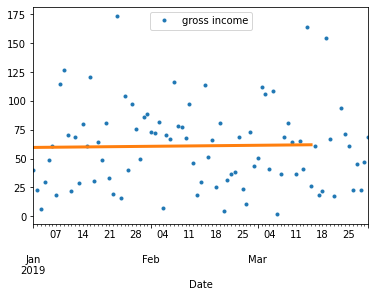

In [ ]:
ax = df_city.plot(style='.')
y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=14)
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2019-03-16    61.921728
2019-03-17    61.953249
2019-03-18    61.984769
2019-03-19    62.016290
2019-03-20    62.047810
Freq: D, dtype: float64

In [ ]:
y_fore.head(14)

2019-03-16    61.921728
2019-03-17    61.953249
2019-03-18    61.984769
2019-03-19    62.016290
2019-03-20    62.047810
2019-03-21    62.079331
2019-03-22    62.110851
2019-03-23    62.142372
2019-03-24    62.173892
2019-03-25    62.205413
2019-03-26    62.236933
2019-03-27    62.268454
2019-03-28    62.299974
2019-03-29    62.331495
Freq: D, dtype: float64

In [ ]:
mape = mean_absolute_percentage_error_func(test['gross income'],y_fore)
print(mape)

87.61431815688846
